# <u>Métodos No Supervisados - Intro K-means</u>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

## Lectura de datos

Mall Customer Data https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [2]:
df_customers = pd.read_csv("mall-customers.csv")
df_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df_customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
mapping = {'Male': 0, 'Female':1}

df_customers["Gender"] = df_customers["Gender"].map(mapping)

In [6]:
df_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [7]:
df_customers.columns = ['id', 'sexo', 'edad', 'ingreso', 'score']

In [8]:
df_customers.head()

,id,sexo,edad,ingreso,score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


## Clustering con dos variables

In [9]:
df_clustering = df_customers[['edad', 'score']]
df_clustering.head()

,edad,score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [10]:
from sklearn.cluster import KMeans

In [11]:
model = KMeans(n_clusters = 3)

In [12]:
model.fit(df_clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [13]:
model.predict(df_clustering)

array([0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [14]:
df_clustering['cluster'] = model.predict(df_clustering)
df_clustering.head()

<ipython-input-14-4c47229e8929>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['cluster'] = model.predict(df_clustering)


,edad,score,cluster
0,19,39,0
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,0


In [16]:
df_clustering['cluster'].value_counts(normalize=True)

0    0.455
2    0.310
1    0.235
Name: cluster, dtype: float64

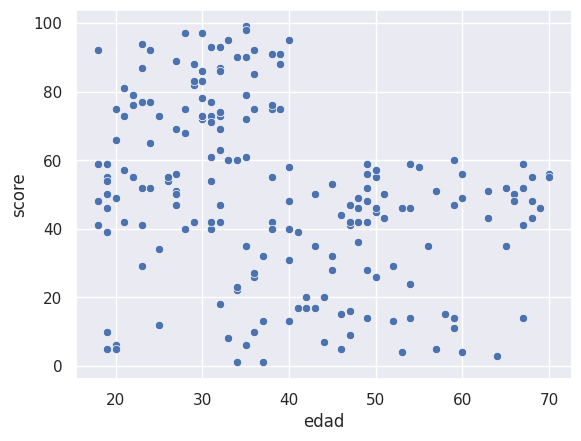

In [17]:
sns.scatterplot(data = df_clustering, x = 'edad', y = 'score')
plt.show()

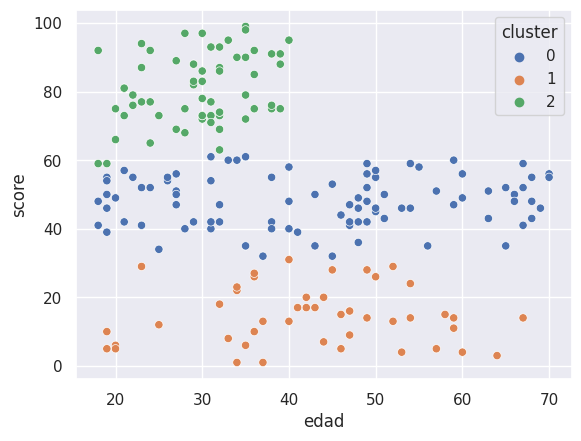

In [19]:
sns.scatterplot(data = df_clustering, x = 'edad', y = 'score', hue = 'cluster', palette = 'deep')
plt.show()

## Preprocesamiento de variables

In [20]:
df_clustering = df_customers[['edad', 'score']]

In [21]:
df_clustering.head()

,edad,score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_clustering),columns = df_clustering.columns)
df_scaled.head()

,edad,score
0,0.019231,0.387755
1,0.057692,0.816327
2,0.038462,0.051020
3,0.096154,0.775510
4,0.250000,0.397959


## clustering con variables escaladas

In [24]:
model = KMeans(n_clusters = 3)

In [25]:
model.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [26]:
model.predict(df_scaled)

array([0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1,
       0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [27]:
df_clustering['cluster'] = model.predict(df_scaled)
df_clustering.head()

<ipython-input-27-6c09a3002e77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['cluster'] = model.predict(df_scaled)


,edad,score,cluster
0,19,39,0
1,21,81,1
2,20,6,0
3,23,77,1
4,31,40,0


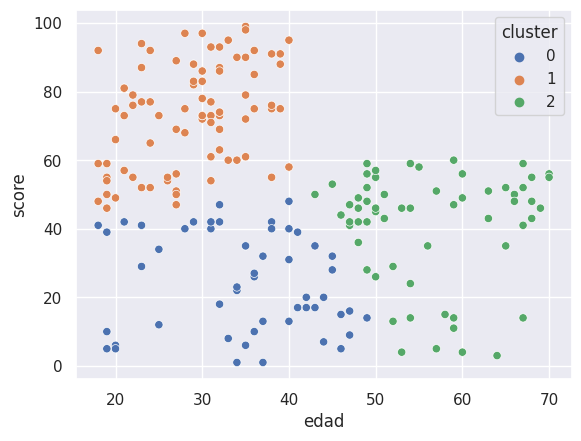

In [28]:
sns.scatterplot(data = df_clustering, x = 'edad', y = 'score', hue = 'cluster', palette = 'deep')
plt.show()

## Descriptivos de clustering

In [29]:
df_clustering.head()

,edad,score,cluster
0,19,39,0
1,21,81,1
2,20,6,0
3,23,77,1
4,31,40,0


In [30]:
df_clustering['cluster'].value_counts()

1    85
2    62
0    53
Name: cluster, dtype: int64

In [31]:
df_clustering.groupby('cluster').mean()

,edad,score
cluster,,
0,34.981132,24.433962
1,28.694118,73.482353
2,56.080645,40.306452


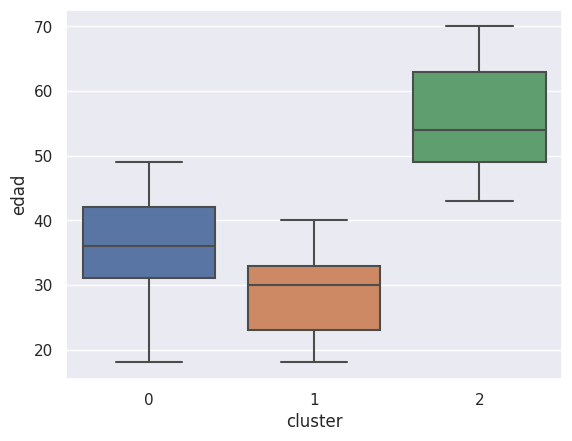

In [32]:
sns.boxplot(data = df_clustering, y = 'edad', x = 'cluster')
plt.show()

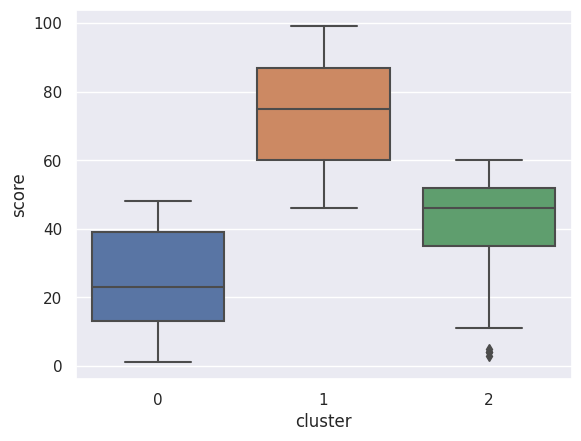

In [33]:
sns.boxplot(data = df_clustering, y = 'score', x = 'cluster')
plt.show()

## Clustering con más variables

In [34]:
df_customers.head()

,id,sexo,edad,ingreso,score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [35]:
df_clustering = df_customers[['sexo','edad', 'ingreso', 'score']]
df_clustering.head()

,sexo,edad,ingreso,score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [36]:
scaler = MinMaxScaler()

In [37]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_clustering),columns = df_clustering.columns)
df_scaled.head()

,sexo,edad,ingreso,score
0,0.0,0.019231,0.000000,0.387755
1,0.0,0.057692,0.000000,0.816327
2,1.0,0.038462,0.008197,0.051020
3,1.0,0.096154,0.008197,0.775510
4,1.0,0.250000,0.016393,0.397959


In [38]:
model = KMeans(n_clusters = 5)
model.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [39]:
df_customers['cluster'] = model.predict(df_scaled)

In [40]:
df_customers.head()

,id,sexo,edad,ingreso,score,cluster
0,1,0,19,15,39,1
1,2,0,21,15,81,1
2,3,1,20,16,6,2
3,4,1,23,16,77,0
4,5,1,31,17,40,0


In [41]:
df_customers['cluster'].value_counts()

0    57
2    55
1    42
3    32
4    14
Name: cluster, dtype: int64

In [42]:
df_customers.groupby('cluster').mean()

,id,sexo,edad,ingreso,score
cluster,,,,,
0,100.210526,1.0,28.438596,59.666667,67.684211
1,100.809524,0.0,28.690476,60.904762,70.238095
2,94.818182,1.0,48.109091,58.818182,34.781818
3,83.531250,0.0,57.031250,53.125000,36.718750
4,161.857143,0.0,33.785714,87.000000,10.285714


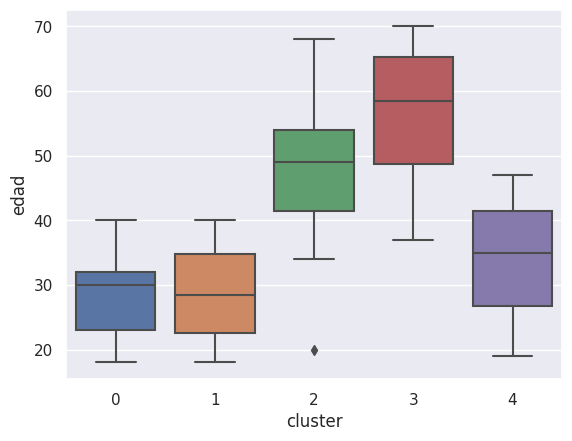

In [43]:
sns.boxplot(data = df_customers, y = 'edad', x = 'cluster')
plt.show()

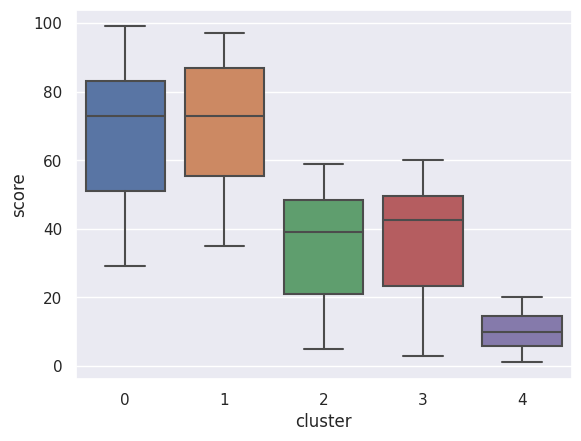

In [44]:
sns.boxplot(data = df_customers, y = 'score', x = 'cluster')
plt.show()

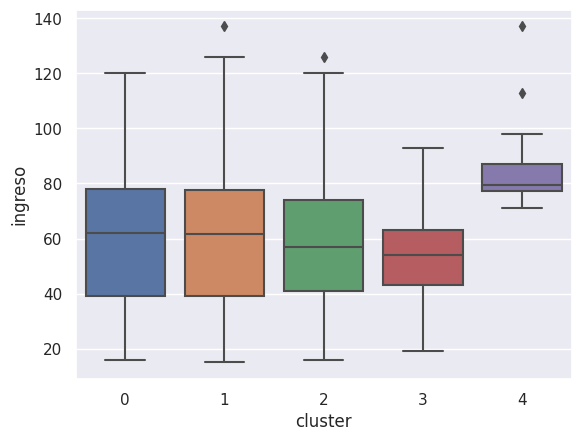

In [45]:
sns.boxplot(data = df_customers, y = 'ingreso', x = 'cluster')
plt.show()

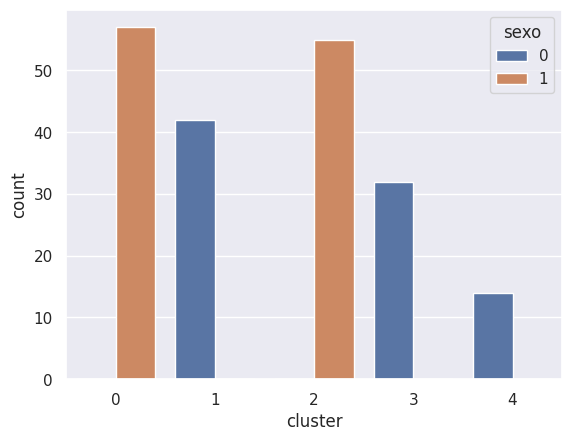

In [46]:
sns.countplot(data = df_customers, x = 'cluster', hue = 'sexo')
plt.show()